# Neural Networks Library

My idea of programming a library for Neural Networks started in 2021. I've began watching a lot of Youtube-Turorials about Machine Learning and programming in general. My experience since then had been Arduino, HTML/CSS/JS, LEGO-Mindstorms and Scratch, so to say the obvious, i was a bloody beginner.

## First Try Outs

In 2021 I got a Laptop from school because we had homeschooling and I started programming on it. I downloaded Python, Arduino and started first designing my first networks in Google-Colab (with tensorflow). Soon I also found a good tutorial to make my own Neural Networks (sentdex) and till then I had already a pretty good understanding of the logic behind a Neural Network, so all that was left was to be able to program it. I had multiple runs where I started this project again. Every time I ended up on a new problem, where often my understanding and motivation was done, but I always got on step further.

## This Project

This year 2022/23 I decided again to build a new version, that finally could optimize a Network efficiently. The first part of the year I took long time to build my mindset and decide what to focus on. In november I started my changing my daily mindset bit by bit, till in december I got to the decision to make less excuses and let what I had prepared in my head outside in my life. I changed my daily routine drastically and tried to stop instant gratification so I can build powerful habits.
Now in January, school has got back to regularity and my routine took a lot of will power but is still standing. For not falling in a routine where I don't continously conciously improve, I decided it's time to continue on this journey and start a new Neural Network project! 

In [1]:
import numpy as np
import nnfs
import matplotlib.pyplot as plt
from library import *
from nnfs.datasets import spiral_data, vertical_data
nnfs.init()

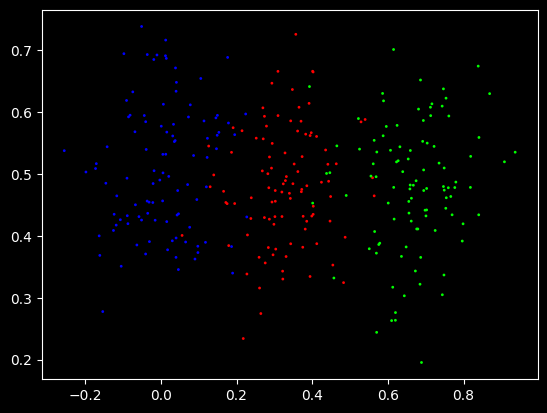

In [2]:
X, y = vertical_data(samples = 100, classes = 3)
plt.style.use('dark_background')
plt.scatter(X[:,0], X[:,1], c=y, s=1, cmap="brg")
plt.show()

In [3]:
myNN = Network(LossFunc=CategorialCrossEntropy())
myNN.addLayer(Layer_Dense(2, 5, ReLU()))
myNN.addLayer(Layer_Dense(5, 3, ReLU()))
myNN.addLayer(Layer_Dense(3, 3, Softmax()))

print(myNN.run(np.array([3,1])))
print("pause")
print(myNN.run(np.array(X))[:5])
print("Loss:\t"+ str(myNN.calcLoss(y)))
print("Accuracy:\t"+ str(myNN.calcAccuracy(y)))

[[0.33333337 0.33333337 0.33333325]]
pause
[[0.33333334 0.33333334 0.3333333 ]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.3333333 ]
 [0.33333334 0.33333334 0.33333334]]
Loss:	1.0986123
Accuracy:	0.3333333333333333


In [4]:
X, y = vertical_data(samples = 5000, classes = 3)


Loss:	1.0986121


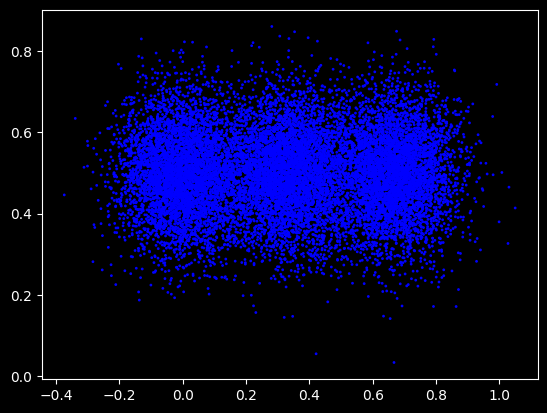

In [5]:
output = myNN(X)
print("Loss:\t"+str(myNN.calcLoss(y)))
plt.style.use('dark_background')
plt.scatter(X[:,0], X[:,1], c=output, s=1, cmap="brg")
plt.show()

New optimal found: 	1.098558
New optimal found: 	1.0984765
New optimal found: 	1.0984646
New optimal found: 	1.0983776
New optimal found: 	1.0971725
New optimal found: 	1.0967219
New optimal found: 	1.0955495
New optimal found: 	1.0949483
New optimal found: 	1.0945371
New optimal found: 	1.0919145
New optimal found: 	1.0916345
New optimal found: 	1.0904933
New optimal found: 	1.0887872
New optimal found: 	1.0862269
New optimal found: 	1.0855951
New optimal found: 	1.0799007
ACC:	0.3333333333333333


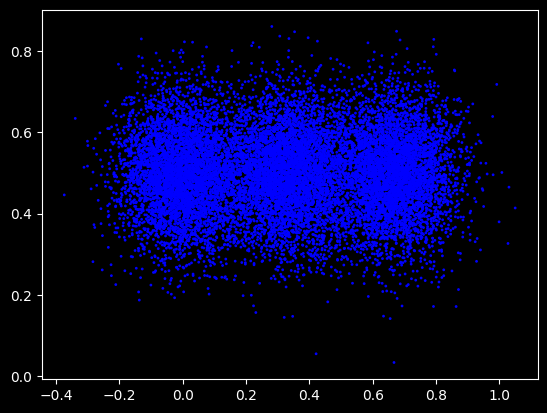

In [6]:
myNN.optimizeRandomly(200, 0.05, X, y)
print("ACC:\t"+str(myNN.calcAccuracy(y)))
output = myNN(X)
plt.style.use('dark_background')
plt.scatter(X[:,0], X[:,1], c=output, s=1, cmap="brg")
plt.show()